In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv("https://raw.githubusercontent.com/Bruteforce004/Cleaned-data-of-Indian-Forests/main/2019_forest_cover_statewise_india.csv")

In [47]:
df.head()

,Unnamed: 0,State/UT,Geo_Area(GA) in sq km,2019_Assessment_VDF,2019_Assessment_Total_Forest_Cover,per_of_GA,change_in_forest_cover_wrt_ISFR_2017,change_1_per_wrt_ISFR_2017,scrub,2019_Assessment_MDF,2019_Assessment_OF
0,0,Andhra Pradesh,162968,1994.0,29137.0,17.88,990.0,3.52,8255.0,13938.0,13205.0
1,1,Arunachal Pradesh,83743,21095.0,66688.0,79.63,-276.0,-0.41,229.0,30557.0,15036.0
2,2,Assam,78438,2795.0,28327.0,36.11,222.0,0.79,173.0,10279.0,15253.0
3,3,Bihar,94163,333.0,7306.0,7.76,7.0,0.10,250.0,3280.0,3693.0
4,4,Chhattisgarh,135192,7068.0,55611.0,41.13,64.0,0.12,610.0,32198.0,16345.0


In [48]:
df.drop(["Unnamed: 0","Geo_Area(GA) in sq km",'per_of_GA','change_in_forest_cover_wrt_ISFR_2017','change_1_per_wrt_ISFR_2017'],axis=1,inplace=True)

In [49]:
df.drop(labels=[38],inplace=True)

In [50]:
dict = {'State/UT':['Ladakh'],
        '2019_Assessment_VDF':[77.62],
        '2019_Assessment_Total_Forest_Cover':[2489.30],
        'scrub':[297.99],
        '2019_Assessment_MDF':[659.89],
        '2019_Assessment_OF':[1751.79]}
df1 = pd.DataFrame(dict)
df = pd.concat([df, df1], ignore_index = True)
df.tail()

,State/UT,2019_Assessment_VDF,2019_Assessment_Total_Forest_Cover,scrub,2019_Assessment_MDF,2019_Assessment_OF
34,Dadra & Nagar Haveli,0.00,207.00,5.00,80.00,127.00
35,Daman & Diu,1.40,20.49,0.19,5.69,13.40
36,Lakshadweep,0.00,27.10,0.00,16.09,11.01
37,Puducherry,0.00,52.41,0.00,17.66,34.75
38,Ladakh,77.62,2489.30,297.99,659.89,1751.79


In [51]:
df = df.sort_values('2019_Assessment_Total_Forest_Cover', ascending = False)

In [30]:
df.loc[12,'State/UT'] = 'Jammu & Kashmir'
df.loc[32,'State/UT'] = 'Andaman & Nicobar'
df.loc[9,'State/UT'] = 'Himachal Pradesh'
df.head()

,State/UT,2019_Assessment_VDF,2019_Assessment_Total_Forest_Cover,scrub,2019_Assessment_MDF,2019_Assessment_OF
16,Madhya Pradesh,6676.0,77482.0,6002.0,34341.0,36465.0
1,Arunachal Pradesh,21095.0,66688.0,229.0,30557.0,15036.0
4,Chhattisgarh,7068.0,55611.0,610.0,32198.0,16345.0
22,Odisha,6970.0,51619.0,4327.0,21552.0,23097.0
17,Maharashtra,8721.0,50778.0,4256.0,20572.0,21485.0


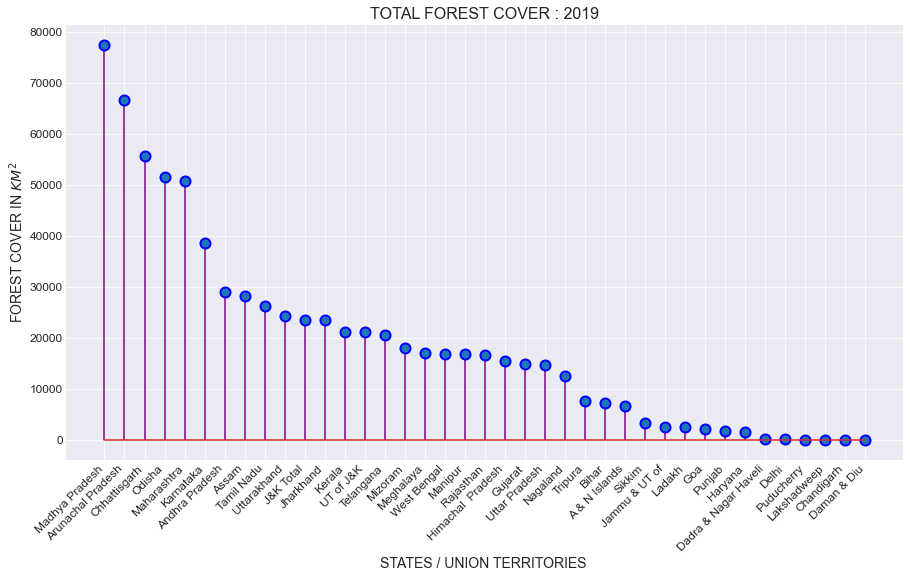

In [52]:
plt.figure(figsize=(15,8))                                  
plt.style.use("seaborn-darkgrid")

y = df['2019_Assessment_Total_Forest_Cover']
x = df['State/UT']
width = 0.5

#Formatting marker and baselines
(markers, stemlines, baseline) = plt.stem(x, y, markerfmt='o', linefmt='purple')
plt.setp(markers, marker='o', markersize=10, markeredgecolor="bLUE", markeredgewidth=2)

plt.xticks(x,rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize = 12)
plt.ticklabel_format(axis="y", style='plain')
plt.title("TOTAL FOREST COVER : 2019", fontsize=16)
plt.xlabel("STATES / UNION TERRITORIES ", fontsize = 14)
plt.ylabel("FOREST COVER IN $KM^{2}$", fontsize = 14)

### dpi increases resolution of the picture
plt.savefig('Total_Forest_Statewise_bar_2019.png',transparent=False, bbox_inches='tight', pad_inches=0, dpi = 1200)     
plt.show()
plt.close()

*Interpretation : It is observed that India holds a total forest cover of 7,12,249 sq Km area of its total geographical region with Madhya Pradhesh at the top accounting for 77,482 sq Km area whereas Daman and Diu holding the last position with area of 20.5 sq Km.*

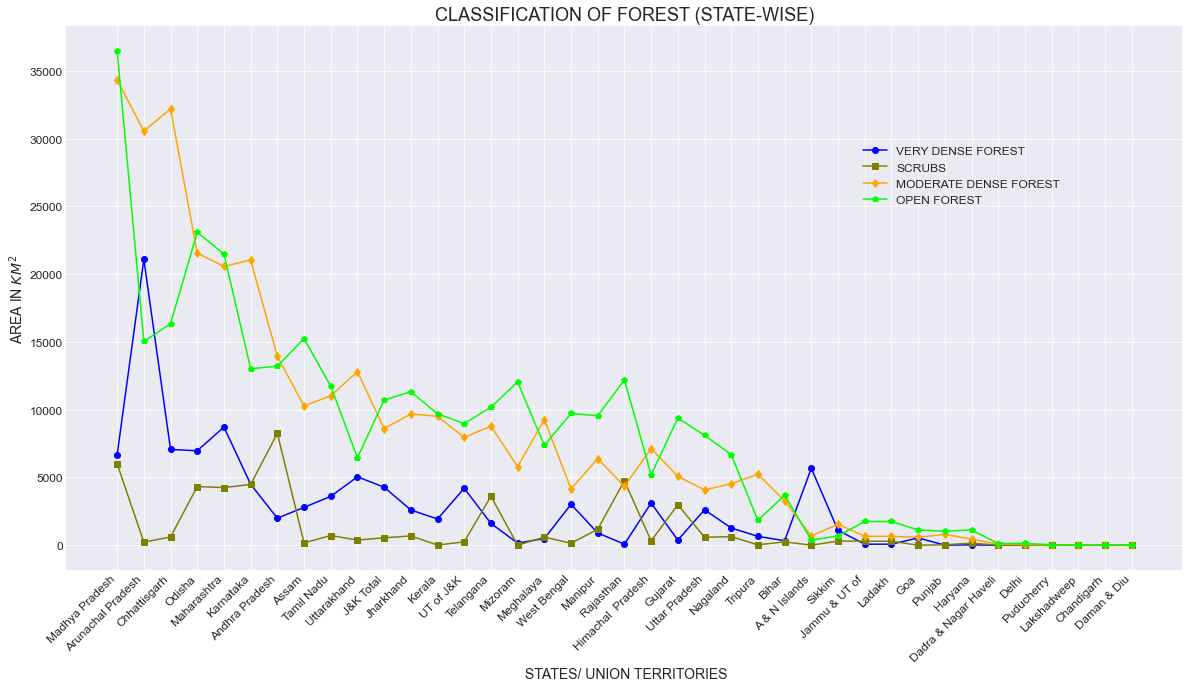

In [56]:
x = df['State/UT']
y1 = df['2019_Assessment_VDF']
y2 = df['scrub']
y3 = df['2019_Assessment_MDF']
y4 = df['2019_Assessment_OF']

plt.figure(figsize=(20,10))
plt.plot( x, y1, marker='o', markerfacecolor='blue', color='blue',label='VERY DENSE FOREST')
plt.plot( x, y2, marker='s', markerfacecolor='olive', color='olive',label='SCRUBS')
plt.plot( x, y3, marker='d', markerfacecolor='orange', color='orange', label='MODERATE DENSE FOREST')
plt.plot( x, y4, marker='p', markerfacecolor='lime', color='lime', label='OPEN FOREST')

plt.style.use("seaborn-darkgrid")
plt.title('CLASSIFICATION OF FOREST (STATE-WISE)', fontsize = 18)
plt.xlabel(' STATES/ UNION TERRITORIES',fontsize = 14)
plt.xticks(x,fontsize = 12, rotation = 45, ha = 'right')
plt.ylabel('AREA IN $KM^{2}$',fontsize = 14)
plt.yticks(fontsize = 12)
plt.legend(bbox_to_anchor=(0.9, 0.8), fancybox=True, fontsize= 12)

plt.savefig('Classification_Statewise_2019.png', transparent=False, bbox_inches='tight', pad_inches=0, dpi=1200)

plt.show()
plt.close()

*Interpretation: The above visualisation shows the distribution of classification of forests over the States and Union Territories. It can be distinguished that from the total forest cover, India holds a maximum percentage of Moderate Dense forest followed by Open Forests, Very Dense Forests and lastly Scrubs respectively.*